## 1. Load Required Libraries

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as utils
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

## 2. Load Configuration File

In [395]:
config = utils.load_config()

## 3. Load Train Set

In [396]:
x_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

In [397]:
train_set = pd.concat([x_train, y_train], axis = 1)

In [417]:
x, y = RandomUnderSampler(random_state = 42).fit_resample(x_train, y_train)
train_set_bal = pd.concat([x, y], axis = 1)

## 4. Data Exploration

### 4.1. Quick look dataset

In [418]:
# Quick take a loof to our train data
train_set

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
43502          27.120        47.37        938.728   1.66   1.73  11.46  1.787   
16652          13.211        47.92        938.763   2.24   2.33  15.44  2.408   
53451          28.170        43.68        937.321   1.85   1.93  12.76  1.991   
28269          20.540        58.07        939.689   2.25   2.34  15.48  2.414   
11367          10.413        47.82        939.098   2.07   2.15  14.27  2.226   
...               ...          ...            ...    ...    ...    ...    ...   
9809           -3.870        53.07        939.159   2.60   2.70  17.89  2.789   
57969          -6.808        45.95        937.511   2.37   2.46  16.33  2.546   
1350           26.577        56.23        939.719   0.61   0.63   4.19  0.654   
43633          24.920        51.94        938.736   1.34   1.39   9.23  1.439   
37324          27.050        46.83        939.012   2.35   2.45  16.21  2.527   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
43502  0.040       1228        405   12909        19428           1  
16652  0.054       1264        424   12869        19410           1  
53451  0.045        125        400   12793        20595           0  
28269  0.055        202        400   13188        20014           1  
11367  0.050       1073        629   12797        19449           1  
...      ...        ...        ...     ...          ...         ...  
9809   0.063        689        876   12685        19562           1  
57969  0.058         82        409   12784        20659           0  
1350   0.015          1        400   13095        19993           0  
43633  0.033       1230        415   12909        19427           1  
37324  0.057       1044        575   12827        19472           1  

[43841 rows x 13 columns]

In [419]:
# Columns name can be more simple, not a major problem

### 4.2. Label distribution

[Text(0, 0, '12511'), Text(0, 0, '31330')]

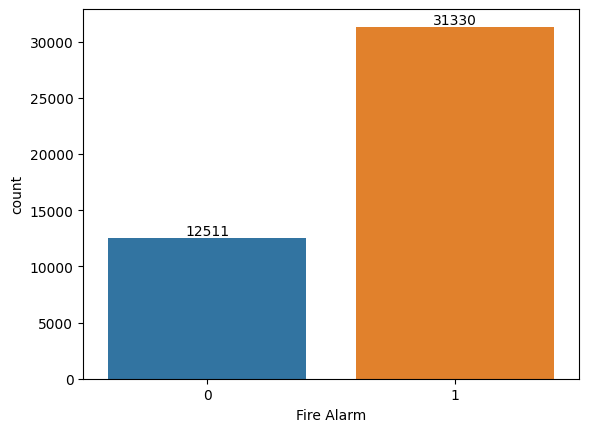

In [420]:
# Check distribution of our label data
ax = sns.countplot(data = train_set, x = "Fire Alarm", label = train_set["Fire Alarm"].unique())
ax.bar_label(ax.containers[0])

[Text(0, 0, '12511'), Text(0, 0, '12511')]

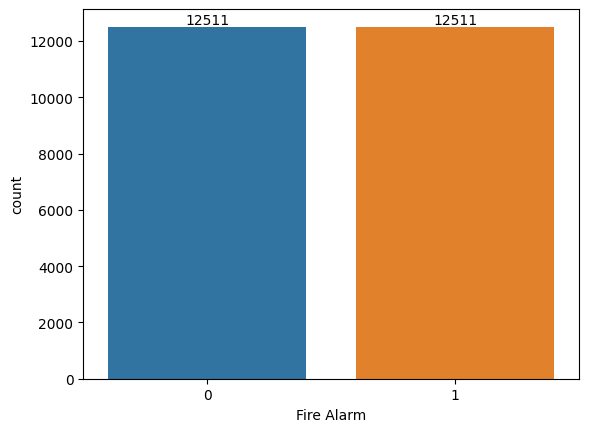

In [421]:
ax = sns.countplot(data = train_set_bal, x = "Fire Alarm", label = train_set["Fire Alarm"].unique())
ax.bar_label(ax.containers[0])

In [422]:
# Class 1 is more than twice as much as class 0
# We need to balancing it

### 4.3. Temperature distribution

<AxesSubplot: xlabel='Temperature[C]', ylabel='Density'>

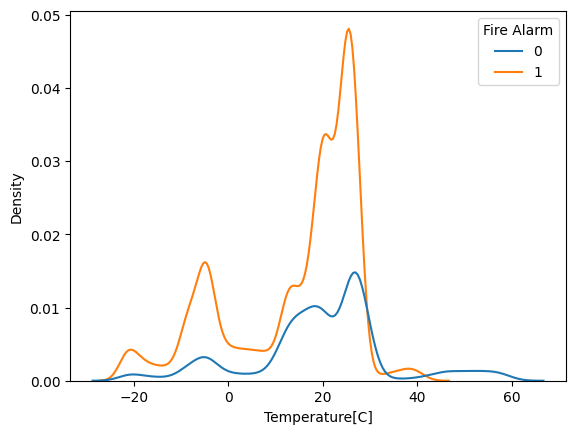

In [423]:
# Check distribution of temperature
sns.kdeplot(data = train_set, x = "Temperature[C]", hue = "Fire Alarm")

<AxesSubplot: xlabel='Temperature[C]', ylabel='Density'>

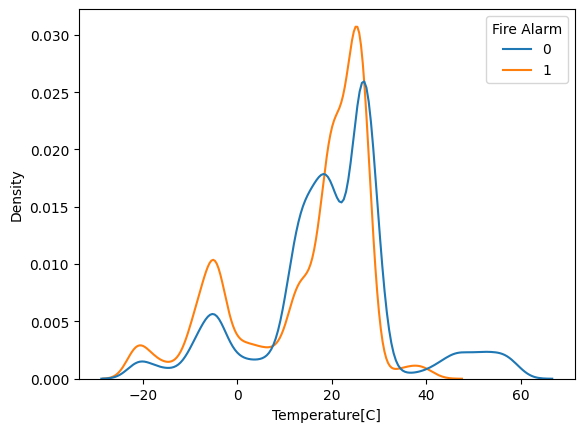

In [424]:
# Dist for balanced data
sns.kdeplot(data = train_set_bal, x = "Temperature[C]", hue = "Fire Alarm")

### 4.4. Humidity Distribution

<AxesSubplot: xlabel='Humidity[%]', ylabel='Density'>

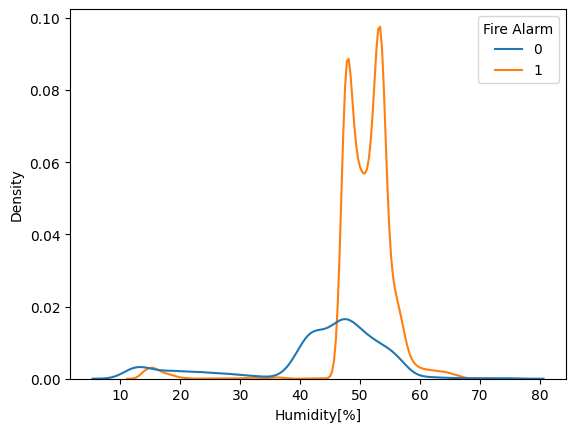

In [425]:
# Check distribution of humidity
sns.kdeplot(data = train_set, x = "Humidity[%]", hue = "Fire Alarm")

<AxesSubplot: xlabel='Humidity[%]', ylabel='Density'>

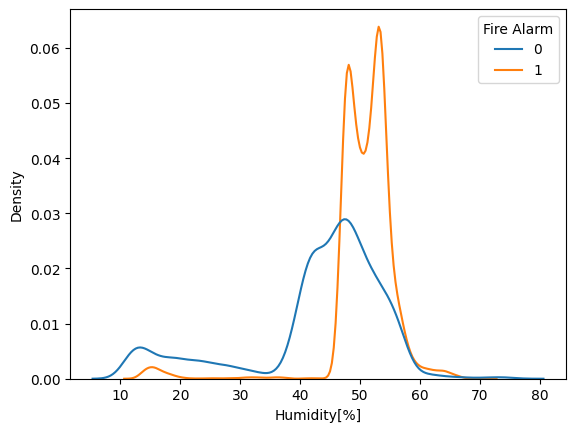

In [426]:
# Dist for balanced data
sns.kdeplot(data = train_set_bal, x = "Humidity[%]", hue = "Fire Alarm")

<AxesSubplot: xlabel='Humidity[%]'>

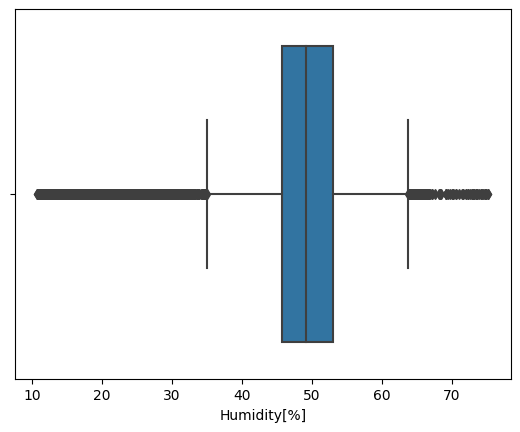

In [427]:
# Check for iqr
sns.boxplot(data = train_set_bal, x = "Humidity[%]")

In [428]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Humidity[%]"].quantile(0.25)
q3 = train_set_bal["Humidity[%]"].quantile(0.75)
iqr = q3 - q1

In [429]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_hum = train_set_bal[~((train_set_bal["Humidity[%]"] < (q1 - 1.5 * iqr)) | (train_set_bal["Humidity[%]"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='Humidity[%]', ylabel='Density'>

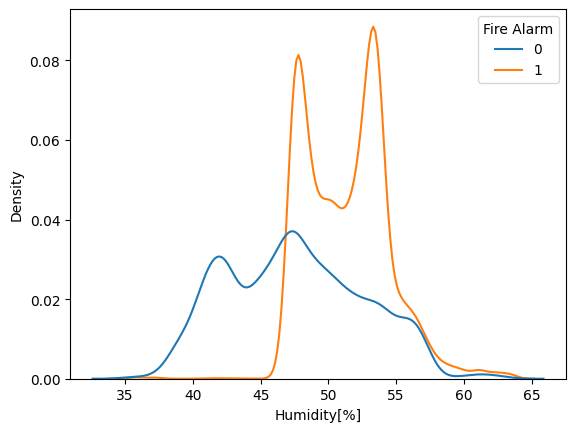

In [430]:
sns.kdeplot(data = train_set_bal_hum, x = "Humidity[%]", hue = "Fire Alarm")

In [505]:
train_set_bal_hum

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
6              17.510        53.84        939.570   1.31   1.36   9.03  1.408   
...               ...          ...            ...    ...    ...    ...    ...   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   
25021          27.040        47.27        938.901   1.50   1.56  10.33  1.611   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
6      0.032         27        400   13202        20139           0  
...      ...        ...        ...     ...          ...         ...  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  
25021  0.036       1059        471   12865        19469           1  

[22521 rows x 13 columns]

### 4.5. Preassure Distribution

<AxesSubplot: xlabel='Pressure[hPa]', ylabel='Density'>

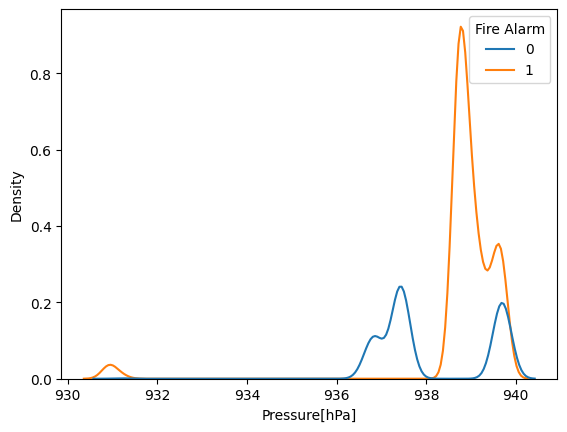

In [433]:
# Check distribution of pressure
sns.kdeplot(data = train_set, x = "Pressure[hPa]", hue = "Fire Alarm")

<AxesSubplot: xlabel='Pressure[hPa]', ylabel='Density'>

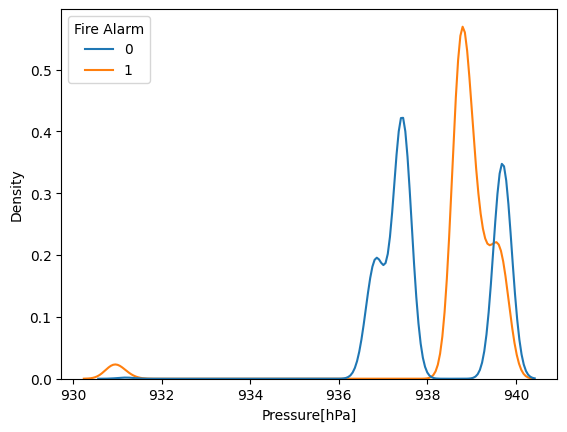

In [434]:
sns.kdeplot(data = train_set_bal, x = "Pressure[hPa]", hue = "Fire Alarm")

<AxesSubplot: xlabel='Pressure[hPa]'>

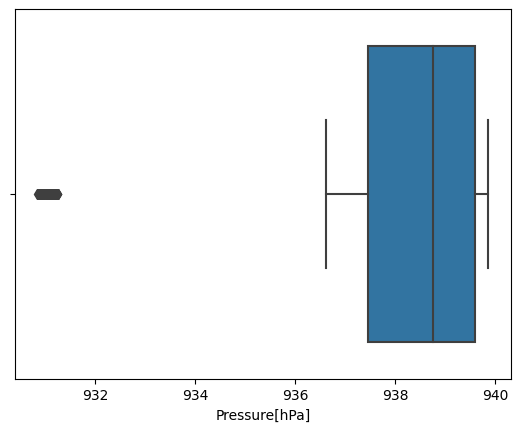

In [435]:
sns.boxplot(data = train_set_bal, x = "Pressure[hPa]")

In [436]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Pressure[hPa]"].quantile(0.25)
q3 = train_set_bal["Pressure[hPa]"].quantile(0.75)
iqr = q3 - q1

In [437]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_pres = train_set_bal[~((train_set_bal["Pressure[hPa]"] < (q1 - 1.5 * iqr)) | (train_set_bal["Pressure[hPa]"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='Pressure[hPa]', ylabel='Density'>

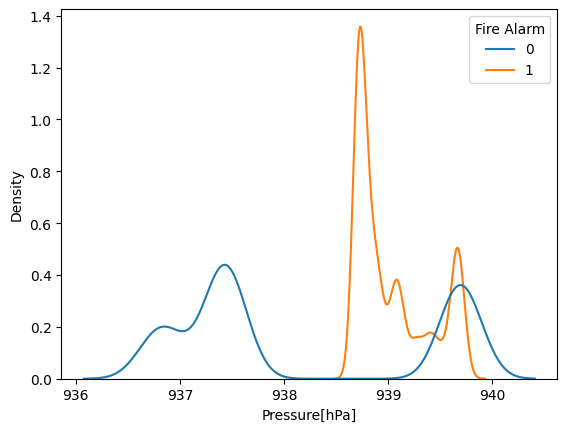

In [438]:
sns.kdeplot(data = train_set_bal_pres, x = "Pressure[hPa]", hue = "Fire Alarm")

In [440]:
train_set_bal_pres

Temperature[C]  Humidity[%]  Pressure[hPa]   PM1.0   PM2.5    NC0.5  \
0              28.170        43.68        937.321    1.85    1.93    12.76   
1              13.700        49.80        939.766    0.27    0.28     1.86   
2              46.780        29.32        936.903  707.59  735.16  4870.08   
3              15.805        53.33        939.655    1.06    1.10     7.26   
4              25.450        44.76        937.426    2.03    2.11    13.99   
...               ...          ...            ...     ...     ...      ...   
25017          24.790        52.24        938.688    1.91    1.98    13.14   
25018          26.950        47.88        938.750    1.47    1.53    10.15   
25019         -21.760        51.23        938.729    1.71    1.78    11.76   
25020          -5.720        53.31        938.729    1.68    1.75    11.58   
25021          27.040        47.27        938.901    1.50    1.56    10.33   

         NC1.0   NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0        1.991   0.045        125        400   12793        20595           0  
1        0.290   0.007         21        400   12910        19855           0  
2      759.431  17.152      60000       4652   11718        17269           0  
3        1.132   0.026         85        400   13193        20099           0  
4        2.181   0.049          0        400   13225        21142           0  
...        ...     ...        ...        ...     ...          ...         ...  
25017    2.050   0.046       1354        422   12946        19381           1  
25018    1.582   0.036       1132        400   12910        19447           1  
25019    1.834   0.041       1341        413   12963        19392           1  
25020    1.806   0.041       1346        418   12952        19387           1  
25021    1.611   0.036       1059        471   12865        19469           1  

[24672 rows x 13 columns]

### 4.6. PM 1.0 Distribution

<AxesSubplot: xlabel='PM1.0', ylabel='Density'>

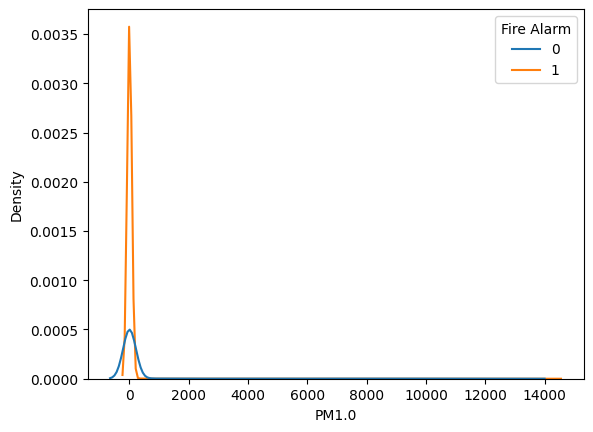

In [441]:
# Check distribution of PM1.0
sns.kdeplot(data = train_set, x = "PM1.0", hue = "Fire Alarm")

In [442]:
train_set["PM1.0"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .98, .99])

count    43841.000000
mean       102.290941
std        934.328679
min          0.000000
25%          1.290000
50%          1.810000
75%          2.090000
80%          2.170000
85%          2.250000
90%          2.370000
95%          2.560000
98%         41.898000
99%       3998.182000
max      14318.170000
Name: PM1.0, dtype: float64

<AxesSubplot: xlabel='PM1.0'>

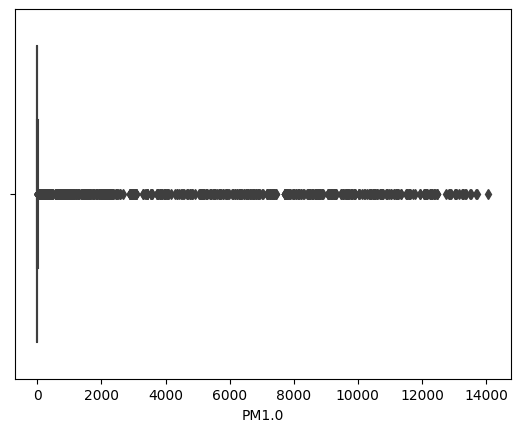

In [443]:
sns.boxplot(data = train_set_bal, x = "PM1.0")

In [444]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["PM1.0"].quantile(0.25)
q3 = train_set_bal["PM1.0"].quantile(0.75)
iqr = q3 - q1

In [445]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_pm1 = train_set_bal[~((train_set_bal["PM1.0"] < (q1 - 1.5 * iqr)) | (train_set_bal["PM1.0"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='PM1.0', ylabel='Density'>

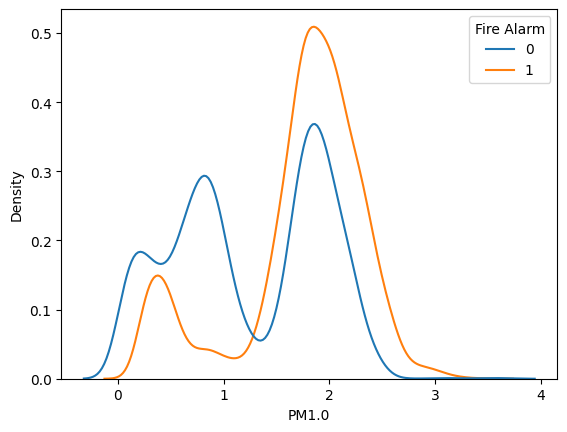

In [446]:
sns.kdeplot(data = train_set_bal_pm1, x = "PM1.0", hue = "Fire Alarm")

In [447]:
train_set_bal_pm1

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
5              47.110        16.15        936.820   1.12   1.16   7.69  1.199   
...               ...          ...            ...    ...    ...    ...    ...   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   
25021          27.040        47.27        938.901   1.50   1.56  10.33  1.611   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
5      0.027        347        400   13466        20811           0  
...      ...        ...        ...     ...          ...         ...  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  
25021  0.036       1059        471   12865        19469           1  

[24125 rows x 13 columns]

### 4.7. PM 2.5 Distribution

<AxesSubplot: xlabel='PM2.5', ylabel='Density'>

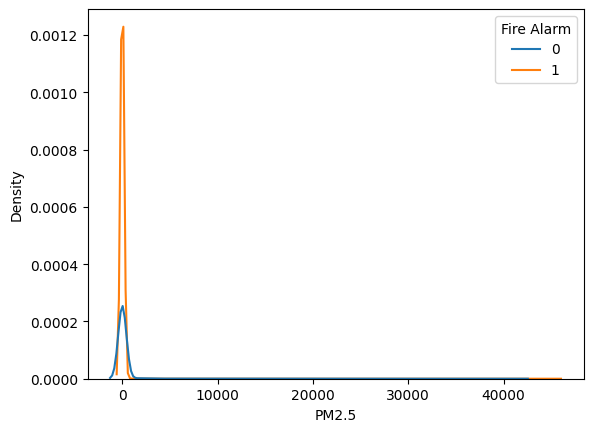

In [448]:
# Check distribution of PM2.5
sns.kdeplot(data = train_set, x = "PM2.5", hue = "Fire Alarm")

In [449]:
train_set["PM2.5"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .98, .99])

count    43841.000000
mean       189.017924
std       2007.342332
min          0.000000
25%          1.340000
50%          1.880000
75%          2.180000
80%          2.250000
85%          2.340000
90%          2.460000
95%          2.660000
98%         45.890000
99%       4910.128000
max      45432.260000
Name: PM2.5, dtype: float64

<AxesSubplot: xlabel='PM2.5'>

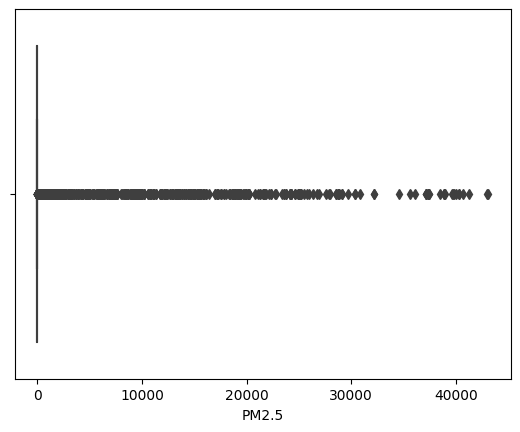

In [450]:
sns.boxplot(data = train_set_bal, x = "PM2.5")

In [451]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["PM2.5"].quantile(0.25)
q3 = train_set_bal["PM2.5"].quantile(0.75)
iqr = q3 - q1

In [452]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_pm25 = train_set_bal[~((train_set_bal["PM2.5"] < (q1 - 1.5 * iqr)) | (train_set_bal["PM2.5"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='PM2.5', ylabel='Density'>

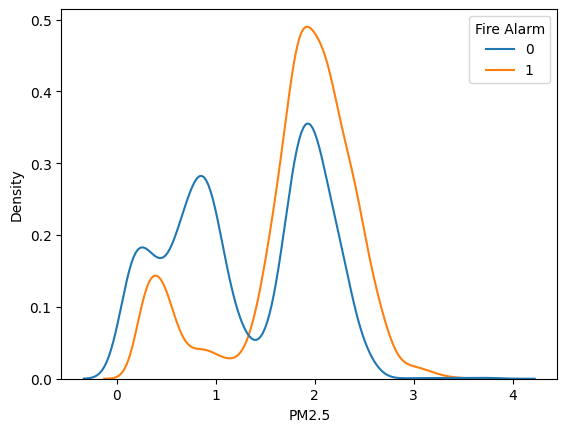

In [453]:
sns.kdeplot(data = train_set_bal_pm25, x = "PM2.5", hue = "Fire Alarm")

In [454]:
train_set[["PM1.0", "PM2.5"]]

PM1.0  PM2.5
43502   1.66   1.73
16652   2.24   2.33
53451   1.85   1.93
28269   2.25   2.34
11367   2.07   2.15
...      ...    ...
9809    2.60   2.70
57969   2.37   2.46
1350    0.61   0.63
43633   1.34   1.39
37324   2.35   2.45

[43841 rows x 2 columns]

In [455]:
train_set_bal_pm25

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
5              47.110        16.15        936.820   1.12   1.16   7.69  1.199   
...               ...          ...            ...    ...    ...    ...    ...   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   
25021          27.040        47.27        938.901   1.50   1.56  10.33  1.611   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
5      0.027        347        400   13466        20811           0  
...      ...        ...        ...     ...          ...         ...  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  
25021  0.036       1059        471   12865        19469           1  

[24124 rows x 13 columns]

### 4.8. NC 0.5 Distribution

<AxesSubplot: xlabel='NC0.5', ylabel='Density'>

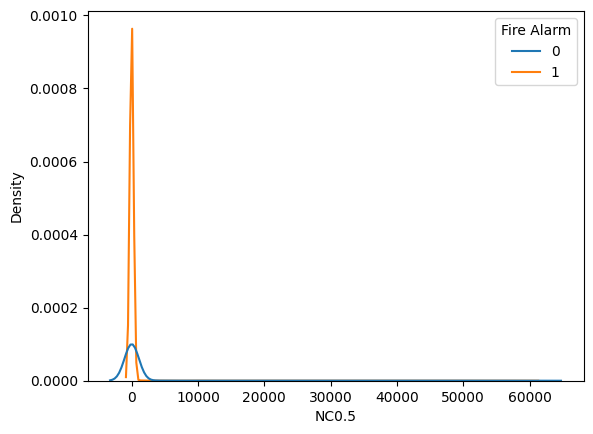

In [456]:
# Check distribution of NC0.5
sns.kdeplot(data = train_set, x = "NC0.5", hue = "Fire Alarm")

In [457]:
train_set["NC0.5"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .98, .99])

count    43841.000000
mean       496.137272
std       4294.444422
min          0.000000
25%          8.870000
50%         12.440000
75%         14.420000
80%         14.930000
85%         15.520000
90%         16.280000
95%         17.600000
98%        282.444000
99%      22235.050000
max      61482.030000
Name: NC0.5, dtype: float64

<AxesSubplot: xlabel='NC0.5'>

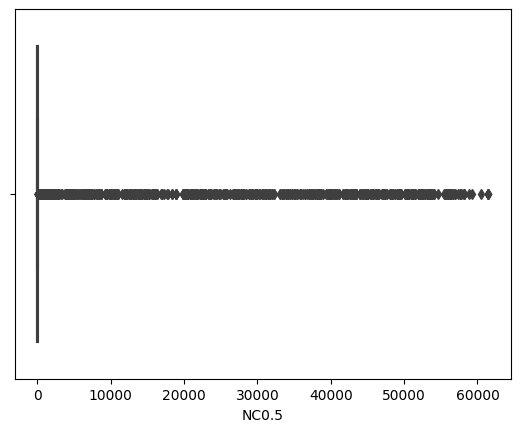

In [458]:
sns.boxplot(data = train_set_bal, x = "NC0.5")

In [459]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["NC0.5"].quantile(0.25)
q3 = train_set_bal["NC0.5"].quantile(0.75)
iqr = q3 - q1

In [460]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_nc05 = train_set_bal[~((train_set_bal["NC0.5"] < (q1 - 1.5 * iqr)) | (train_set_bal["NC0.5"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='NC0.5', ylabel='Density'>

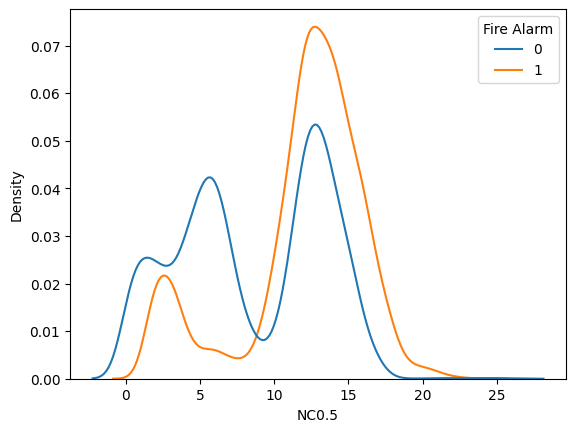

In [461]:
sns.kdeplot(data = train_set_bal_nc05, x = "NC0.5", hue = "Fire Alarm")

In [462]:
train_set_bal_nc05

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
5              47.110        16.15        936.820   1.12   1.16   7.69  1.199   
...               ...          ...            ...    ...    ...    ...    ...   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   
25021          27.040        47.27        938.901   1.50   1.56  10.33  1.611   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
5      0.027        347        400   13466        20811           0  
...      ...        ...        ...     ...          ...         ...  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  
25021  0.036       1059        471   12865        19469           1  

[24127 rows x 13 columns]

### 4.9. NC 1.0 Distribution

<AxesSubplot: xlabel='NC1.0', ylabel='Density'>

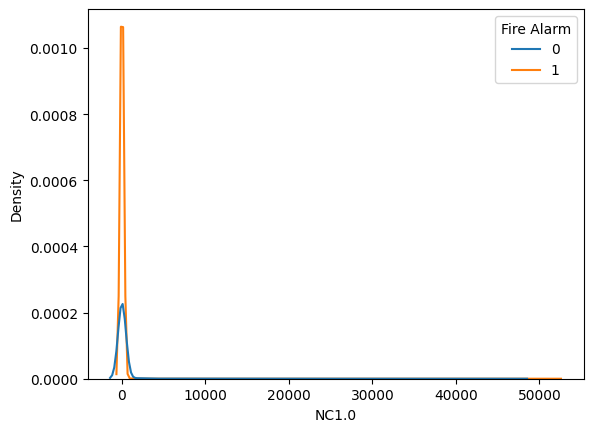

In [463]:
# Check distribution of NC1.0
sns.kdeplot(data = train_set, x = "NC1.0", hue = "Fire Alarm")

In [464]:
train_set["NC1.0"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .98, .99])

count    43841.000000
mean       208.741082
std       2249.719635
min          0.000000
25%          1.386000
50%          1.940000
75%          2.249000
80%          2.329000
85%          2.420000
90%          2.540000
95%          2.746000
98%         47.594200
99%       5269.119400
max      51914.680000
Name: NC1.0, dtype: float64

<AxesSubplot: xlabel='NC1.0'>

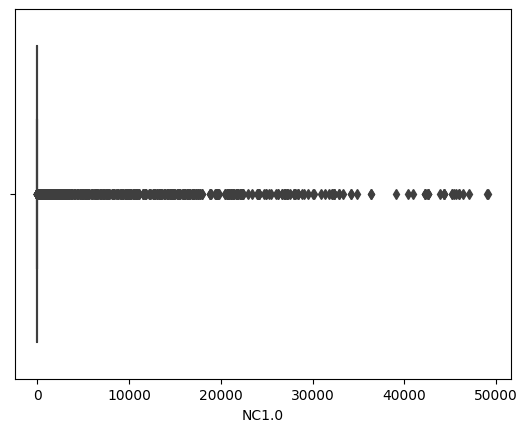

In [465]:
sns.boxplot(data = train_set_bal, x = "NC1.0")

In [466]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["NC1.0"].quantile(0.25)
q3 = train_set_bal["NC1.0"].quantile(0.75)
iqr = q3 - q1

In [467]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_nc1 = train_set_bal[~((train_set_bal["NC1.0"] < (q1 - 1.5 * iqr)) | (train_set_bal["NC1.0"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='NC1.0', ylabel='Density'>

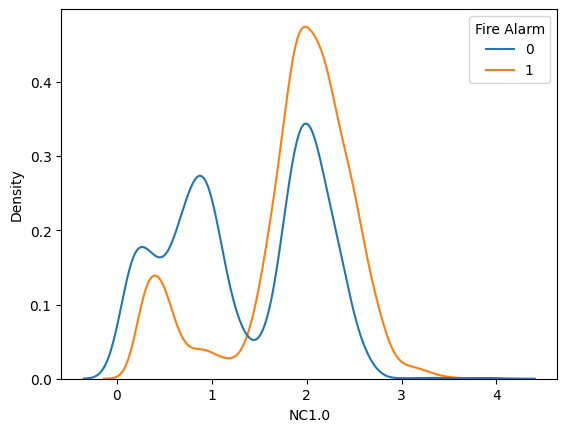

In [468]:
sns.kdeplot(data = train_set_bal_nc1, x = "NC1.0", hue = "Fire Alarm")

In [469]:
train_set_bal_nc1

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
5              47.110        16.15        936.820   1.12   1.16   7.69  1.199   
...               ...          ...            ...    ...    ...    ...    ...   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   
25021          27.040        47.27        938.901   1.50   1.56  10.33  1.611   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
5      0.027        347        400   13466        20811           0  
...      ...        ...        ...     ...          ...         ...  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  
25021  0.036       1059        471   12865        19469           1  

[24121 rows x 13 columns]

### 4.10. NC 2.5 Distribution

<AxesSubplot: xlabel='NC2.5', ylabel='Density'>

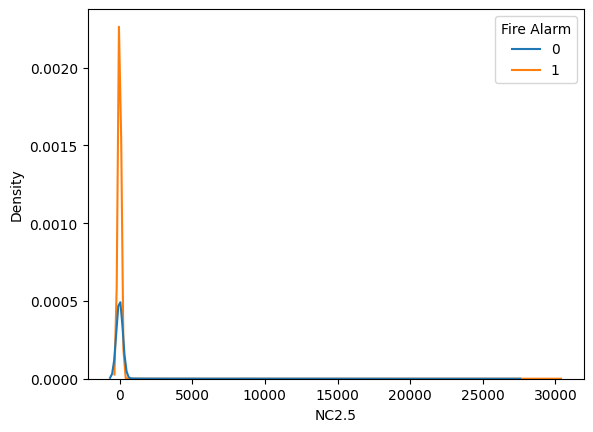

In [470]:
# Check distribution of NC2.5
sns.kdeplot(data = train_set, x = "NC2.5", hue = "Fire Alarm")

In [471]:
train_set["NC2.5"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .98, .99])

count    43841.000000
mean        82.795896
std       1100.423571
min          0.000000
25%          0.033000
50%          0.044000
75%          0.051000
80%          0.053000
85%          0.055000
90%          0.058000
95%          0.063000
98%          1.837000
99%        402.698400
max      30026.438000
Name: NC2.5, dtype: float64

<AxesSubplot: xlabel='NC2.5'>

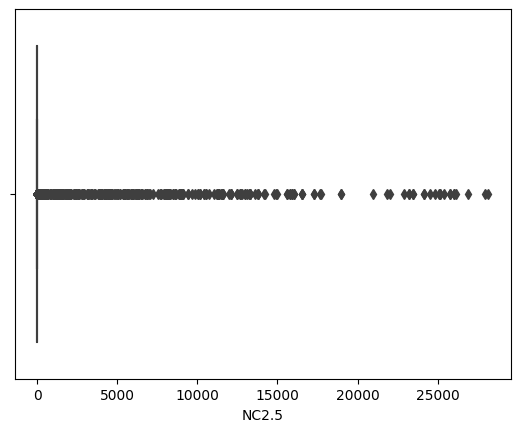

In [472]:
sns.boxplot(data = train_set_bal, x = "NC2.5")

In [473]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["NC2.5"].quantile(0.25)
q3 = train_set_bal["NC2.5"].quantile(0.75)
iqr = q3 - q1

In [474]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_nc25 = train_set_bal[~((train_set_bal["NC2.5"] < (q1 - 1.5 * iqr)) | (train_set_bal["NC2.5"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='NC2.5', ylabel='Density'>

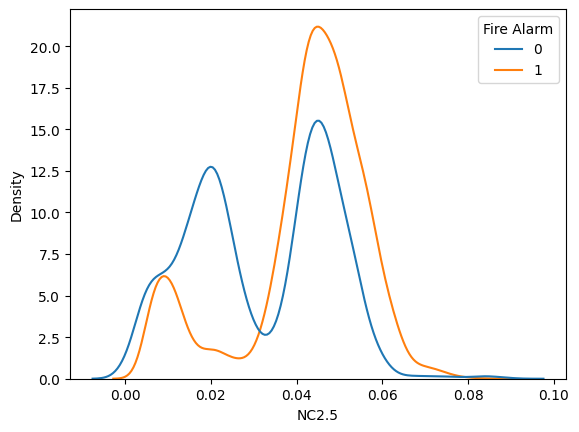

In [475]:
sns.kdeplot(data = train_set_bal_nc25, x = "NC2.5", hue = "Fire Alarm")

In [476]:
train_set_bal_nc25

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
5              47.110        16.15        936.820   1.12   1.16   7.69  1.199   
...               ...          ...            ...    ...    ...    ...    ...   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   
25021          27.040        47.27        938.901   1.50   1.56  10.33  1.611   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
5      0.027        347        400   13466        20811           0  
...      ...        ...        ...     ...          ...         ...  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  
25021  0.036       1059        471   12865        19469           1  

[23942 rows x 13 columns]

### 4.11. TVOC Distribution

<AxesSubplot: xlabel='TVOC[ppb]', ylabel='Density'>

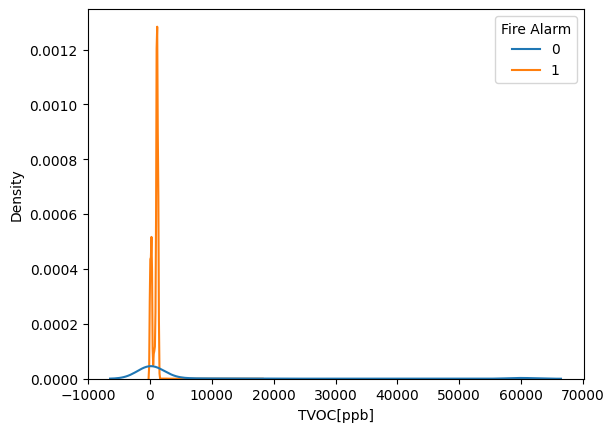

In [477]:
# Check distribution of TVOC
sns.kdeplot(data = train_set, x = "TVOC[ppb]", hue = "Fire Alarm")

In [478]:
train_set["TVOC[ppb]"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .98, .99])

count    43841.000000
mean      1913.721311
std       7740.415177
min          0.000000
25%        130.000000
50%        973.000000
75%       1187.000000
80%       1231.000000
85%       1310.000000
90%       1356.000000
95%       1423.000000
98%      24861.000000
99%      60000.000000
max      60000.000000
Name: TVOC[ppb], dtype: float64

<AxesSubplot: xlabel='TVOC[ppb]'>

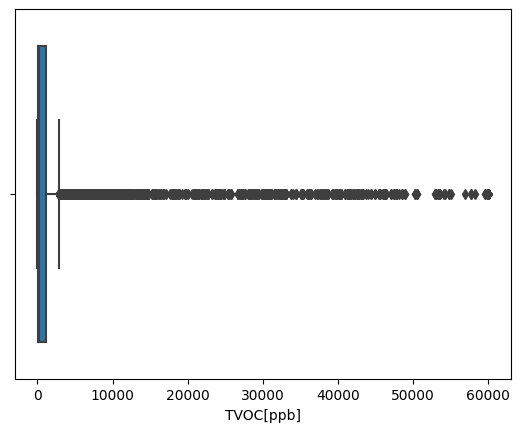

In [479]:
sns.boxplot(data = train_set_bal, x = "TVOC[ppb]")

In [480]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["TVOC[ppb]"].quantile(0.25)
q3 = train_set_bal["TVOC[ppb]"].quantile(0.75)
iqr = q3 - q1

In [481]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_tvoc = train_set_bal[~((train_set_bal["TVOC[ppb]"] < (q1 - 1.5 * iqr)) | (train_set_bal["TVOC[ppb]"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='TVOC[ppb]', ylabel='Density'>

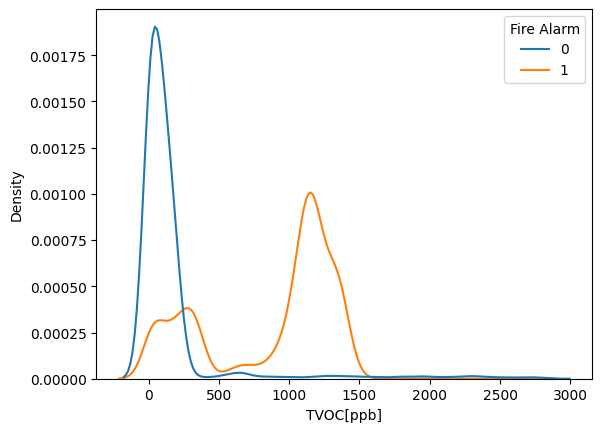

In [482]:
sns.kdeplot(data = train_set_bal_tvoc, x = "TVOC[ppb]", hue = "Fire Alarm")

In [483]:
train_set_bal_tvoc

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
5              47.110        16.15        936.820   1.12   1.16   7.69  1.199   
...               ...          ...            ...    ...    ...    ...    ...   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   
25021          27.040        47.27        938.901   1.50   1.56  10.33  1.611   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
5      0.027        347        400   13466        20811           0  
...      ...        ...        ...     ...          ...         ...  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  
25021  0.036       1059        471   12865        19469           1  

[23370 rows x 13 columns]

### 4.12. eCO2 Distribution

<AxesSubplot: xlabel='eCO2[ppm]', ylabel='Density'>

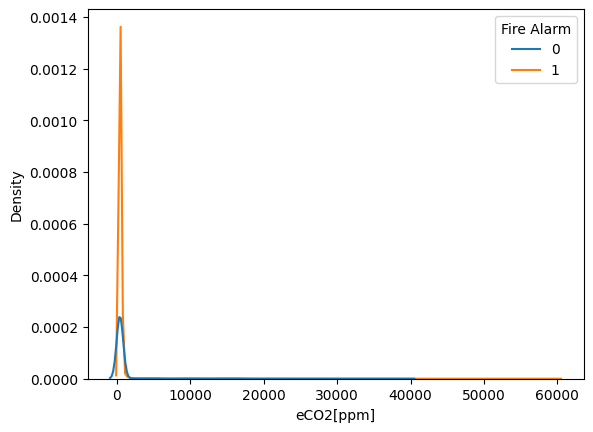

In [484]:
sns.kdeplot(data = train_set, x = "eCO2[ppm]", hue = "Fire Alarm")

In [485]:
train_set["eCO2[ppm]"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .97, .98,.99])

count    43841.000000
mean       670.036587
std       1919.770578
min        400.000000
25%        400.000000
50%        400.000000
75%        438.000000
80%        483.000000
85%        552.000000
90%        629.000000
95%        723.000000
97%        967.800000
98%       2512.400000
99%       9329.800000
max      60000.000000
Name: eCO2[ppm], dtype: float64

<AxesSubplot: xlabel='eCO2[ppm]'>

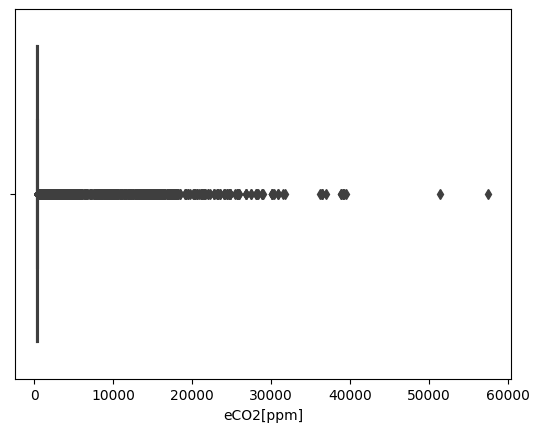

In [486]:
sns.boxplot(data = train_set_bal, x = "eCO2[ppm]")

In [487]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["eCO2[ppm]"].quantile(0.25)
q3 = train_set_bal["eCO2[ppm]"].quantile(0.75)
iqr = q3 - q1

In [488]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_eco2 = train_set_bal[~((train_set_bal["eCO2[ppm]"] < (q1 - 1.5 * iqr)) | (train_set_bal["eCO2[ppm]"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='eCO2[ppm]', ylabel='Density'>

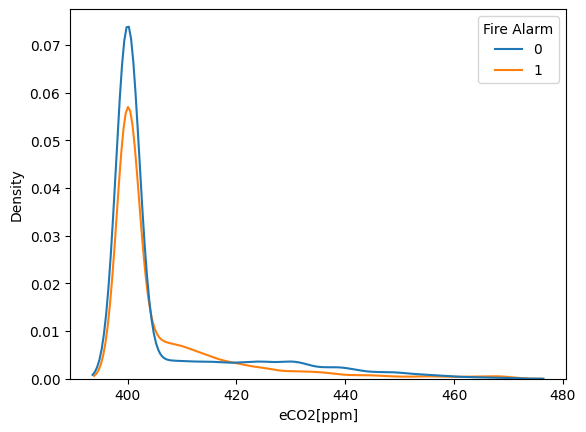

In [489]:
sns.kdeplot(data = train_set_bal_eco2, x = "eCO2[ppm]", hue = "Fire Alarm")

In [490]:
train_set_bal_eco2

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
5              47.110        16.15        936.820   1.12   1.16   7.69  1.199   
...               ...          ...            ...    ...    ...    ...    ...   
25016          -4.875        56.77        939.334   0.44   0.45   3.01  0.469   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
5      0.027        347        400   13466        20811           0  
...      ...        ...        ...     ...          ...         ...  
25016  0.011        345        400   13087        19914           1  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  

[20768 rows x 13 columns]

### 4.13. Raw H2 Distribution

<AxesSubplot: xlabel='Raw H2', ylabel='Density'>

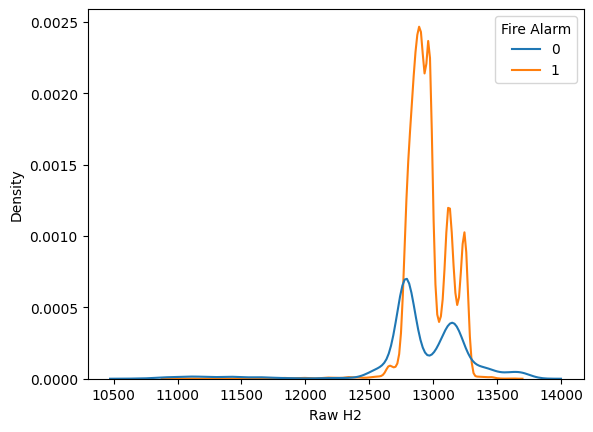

In [491]:
sns.kdeplot(data = train_set, x = "Raw H2", hue = "Fire Alarm")

In [492]:
train_set["Raw H2"].describe(percentiles = [.01, .05, .10, .15, .25, .50, .75, .80, .85, .90, .95, .97, .98,.99])

count    43841.000000
mean     12942.081453
std        271.552695
min      10668.000000
1%       11574.000000
5%       12723.000000
10%      12775.000000
15%      12787.000000
25%      12830.000000
50%      12923.000000
75%      13108.000000
80%      13132.000000
85%      13166.000000
90%      13219.000000
95%      13256.000000
97%      13299.000000
98%      13403.000000
99%      13560.000000
max      13803.000000
Name: Raw H2, dtype: float64

<AxesSubplot: xlabel='Raw H2'>

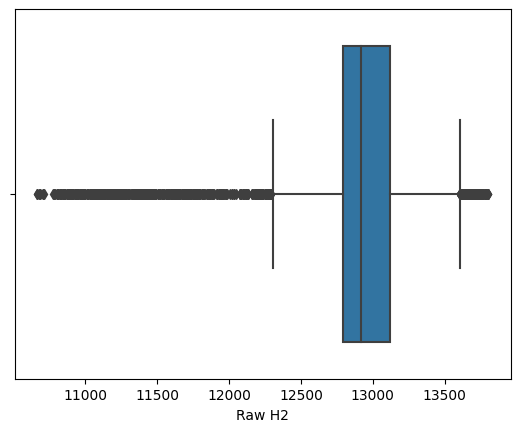

In [493]:
sns.boxplot(data = train_set_bal, x = "Raw H2")

In [494]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Raw H2"].quantile(0.25)
q3 = train_set_bal["Raw H2"].quantile(0.75)
iqr = q3 - q1

In [495]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_h2 = train_set_bal[~((train_set_bal["Raw H2"] < (q1 - 1.5 * iqr)) | (train_set_bal["Raw H2"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='Raw H2', ylabel='Density'>

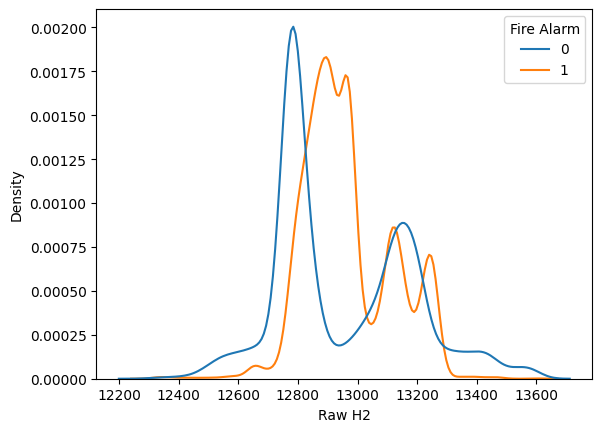

In [496]:
sns.kdeplot(data = train_set_bal_h2, x = "Raw H2", hue = "Fire Alarm")

In [497]:
train_set_bal_h2

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
5              47.110        16.15        936.820   1.12   1.16   7.69  1.199   
...               ...          ...            ...    ...    ...    ...    ...   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   
25021          27.040        47.27        938.901   1.50   1.56  10.33  1.611   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
5      0.027        347        400   13466        20811           0  
...      ...        ...        ...     ...          ...         ...  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  
25021  0.036       1059        471   12865        19469           1  

[24012 rows x 13 columns]

### 4.14. Raw Ethanol Distribution

<AxesSubplot: xlabel='Raw Ethanol', ylabel='Density'>

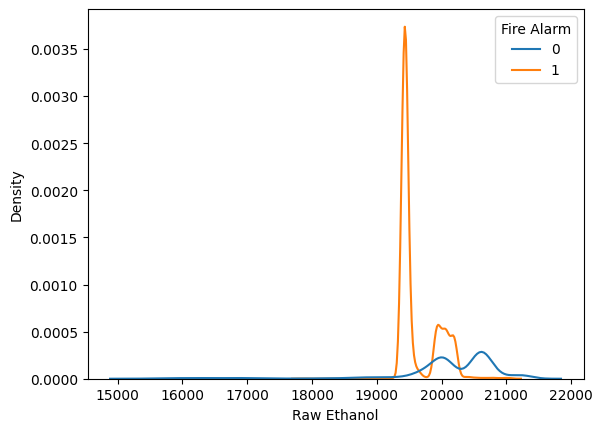

In [498]:
sns.kdeplot(data = train_set, x = "Raw Ethanol", hue = "Fire Alarm")

In [499]:
train_set["Raw Ethanol"].describe(percentiles = [.01, .05, .10, .15, .25, .50, .75, .80, .85, .90, .95, .97, .98,.99])

count    43841.000000
mean     19755.379371
std        607.683882
min      15317.000000
1%       16963.400000
5%       19381.000000
10%      19392.000000
15%      19407.000000
25%      19435.000000
50%      19503.000000
75%      20078.000000
80%      20155.000000
85%      20249.000000
90%      20572.000000
95%      20674.000000
97%      20738.000000
98%      20912.200000
99%      21187.000000
max      21410.000000
Name: Raw Ethanol, dtype: float64

<AxesSubplot: xlabel='Raw Ethanol'>

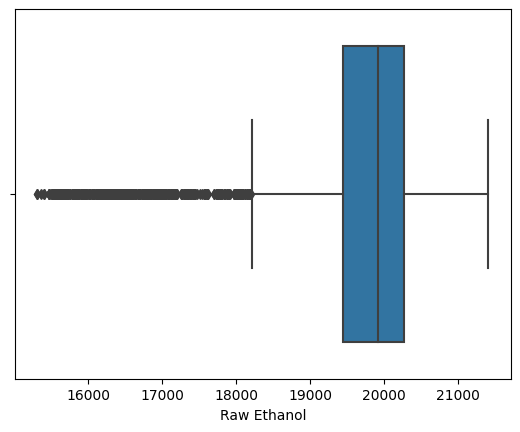

In [500]:
sns.boxplot(data = train_set_bal, x = "Raw Ethanol")

In [501]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Raw Ethanol"].quantile(0.25)
q3 = train_set_bal["Raw Ethanol"].quantile(0.75)
iqr = q3 - q1

In [502]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_etha = train_set_bal[~((train_set_bal["Raw Ethanol"] < (q1 - 1.5 * iqr)) | (train_set_bal["Raw Ethanol"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot: xlabel='Raw Ethanol', ylabel='Density'>

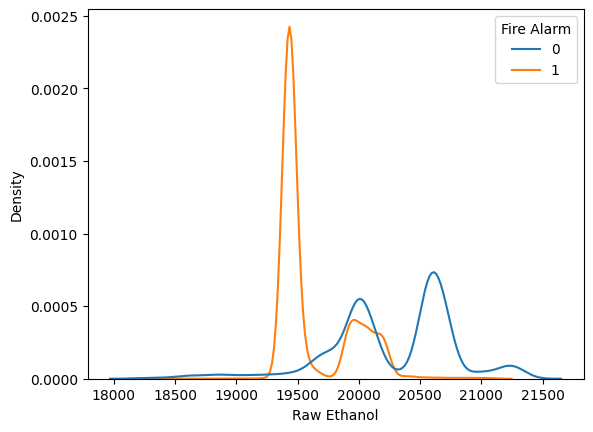

In [503]:
sns.kdeplot(data = train_set_bal_etha, x = "Raw Ethanol", hue = "Fire Alarm")

In [504]:
train_set_bal_etha

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
1              13.700        49.80        939.766   0.27   0.28   1.86  0.290   
3              15.805        53.33        939.655   1.06   1.10   7.26  1.132   
4              25.450        44.76        937.426   2.03   2.11  13.99  2.181   
5              47.110        16.15        936.820   1.12   1.16   7.69  1.199   
...               ...          ...            ...    ...    ...    ...    ...   
25017          24.790        52.24        938.688   1.91   1.98  13.14  2.050   
25018          26.950        47.88        938.750   1.47   1.53  10.15  1.582   
25019         -21.760        51.23        938.729   1.71   1.78  11.76  1.834   
25020          -5.720        53.31        938.729   1.68   1.75  11.58  1.806   
25021          27.040        47.27        938.901   1.50   1.56  10.33  1.611   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  Fire Alarm  
0      0.045        125        400   12793        20595           0  
1      0.007         21        400   12910        19855           0  
3      0.026         85        400   13193        20099           0  
4      0.049          0        400   13225        21142           0  
5      0.027        347        400   13466        20811           0  
...      ...        ...        ...     ...          ...         ...  
25017  0.046       1354        422   12946        19381           1  
25018  0.036       1132        400   12910        19447           1  
25019  0.041       1341        413   12963        19392           1  
25020  0.041       1346        418   12952        19387           1  
25021  0.036       1059        471   12865        19469           1  

[24404 rows x 13 columns]

### 4.15. Cleaned Data

In [553]:
train_set_bal_cleaned = pd.concat(
    [
        train_set_bal_hum,
        train_set_bal_pres,
        train_set_bal_pm1,
        train_set_bal_pm25,
        train_set_bal_nc05,
        train_set_bal_nc1,
        train_set_bal_nc25,
        train_set_bal_tvoc,
        train_set_bal_eco2,
        train_set_bal_h2,
        train_set_bal_etha
    ]
)

In [554]:
count_duplicated_index = train_set_bal_cleaned.index.value_counts()

In [555]:
used_index_data = count_duplicated_index[count_duplicated_index == 11].index

In [559]:
train_set_bal_cleaned = train_set_bal_cleaned.loc[used_index_data].drop_duplicates()

In [560]:
train_set_bal_cleaned

Temperature[C]  Humidity[%]  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  \
0              28.170        43.68        937.321   1.85   1.93  12.76  1.991   
15440          21.670        49.03        939.637   0.78   0.81   5.40  0.842   
15448          26.780        48.29        938.811   2.13   2.21  14.66  2.286   
15447          24.340        54.18        938.712   1.57   1.63  10.79  1.683   
15445          13.983        53.67        938.760   2.09   2.17  14.36  2.239   
...               ...          ...            ...    ...    ...    ...    ...   
11516          26.830        44.09        937.346   1.96   2.04  13.49  2.103   
7691           20.116        49.29        937.353   1.41   1.46   9.70  1.512   
7681           21.633        54.78        939.799   0.01   0.04   0.02  0.043   
7689           13.289        44.77        937.430   2.04   2.12  14.05  2.191   
7764           19.190        47.59        939.592   0.58   0.60   3.99  0.623   

       NC2.5  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  
0      0.045        125        400   12793        20595  
15440  0.019        175        400   13161        20087  
15448  0.052       1270        400   12999        19404  
15447  0.038       1421        417   12971        19372  
15445  0.051       1147        400   12892        19438  
...      ...        ...        ...     ...          ...  
11516  0.047        175        461   12758        20547  
7691   0.034        205        446   12762        20510  
7681   0.024          0        408   12565        19672  
7689   0.049          0        400   13242        21159  
7764   0.014         58        400   13121        19996  

[19201 rows x 12 columns]

### 4.16. Pairplot

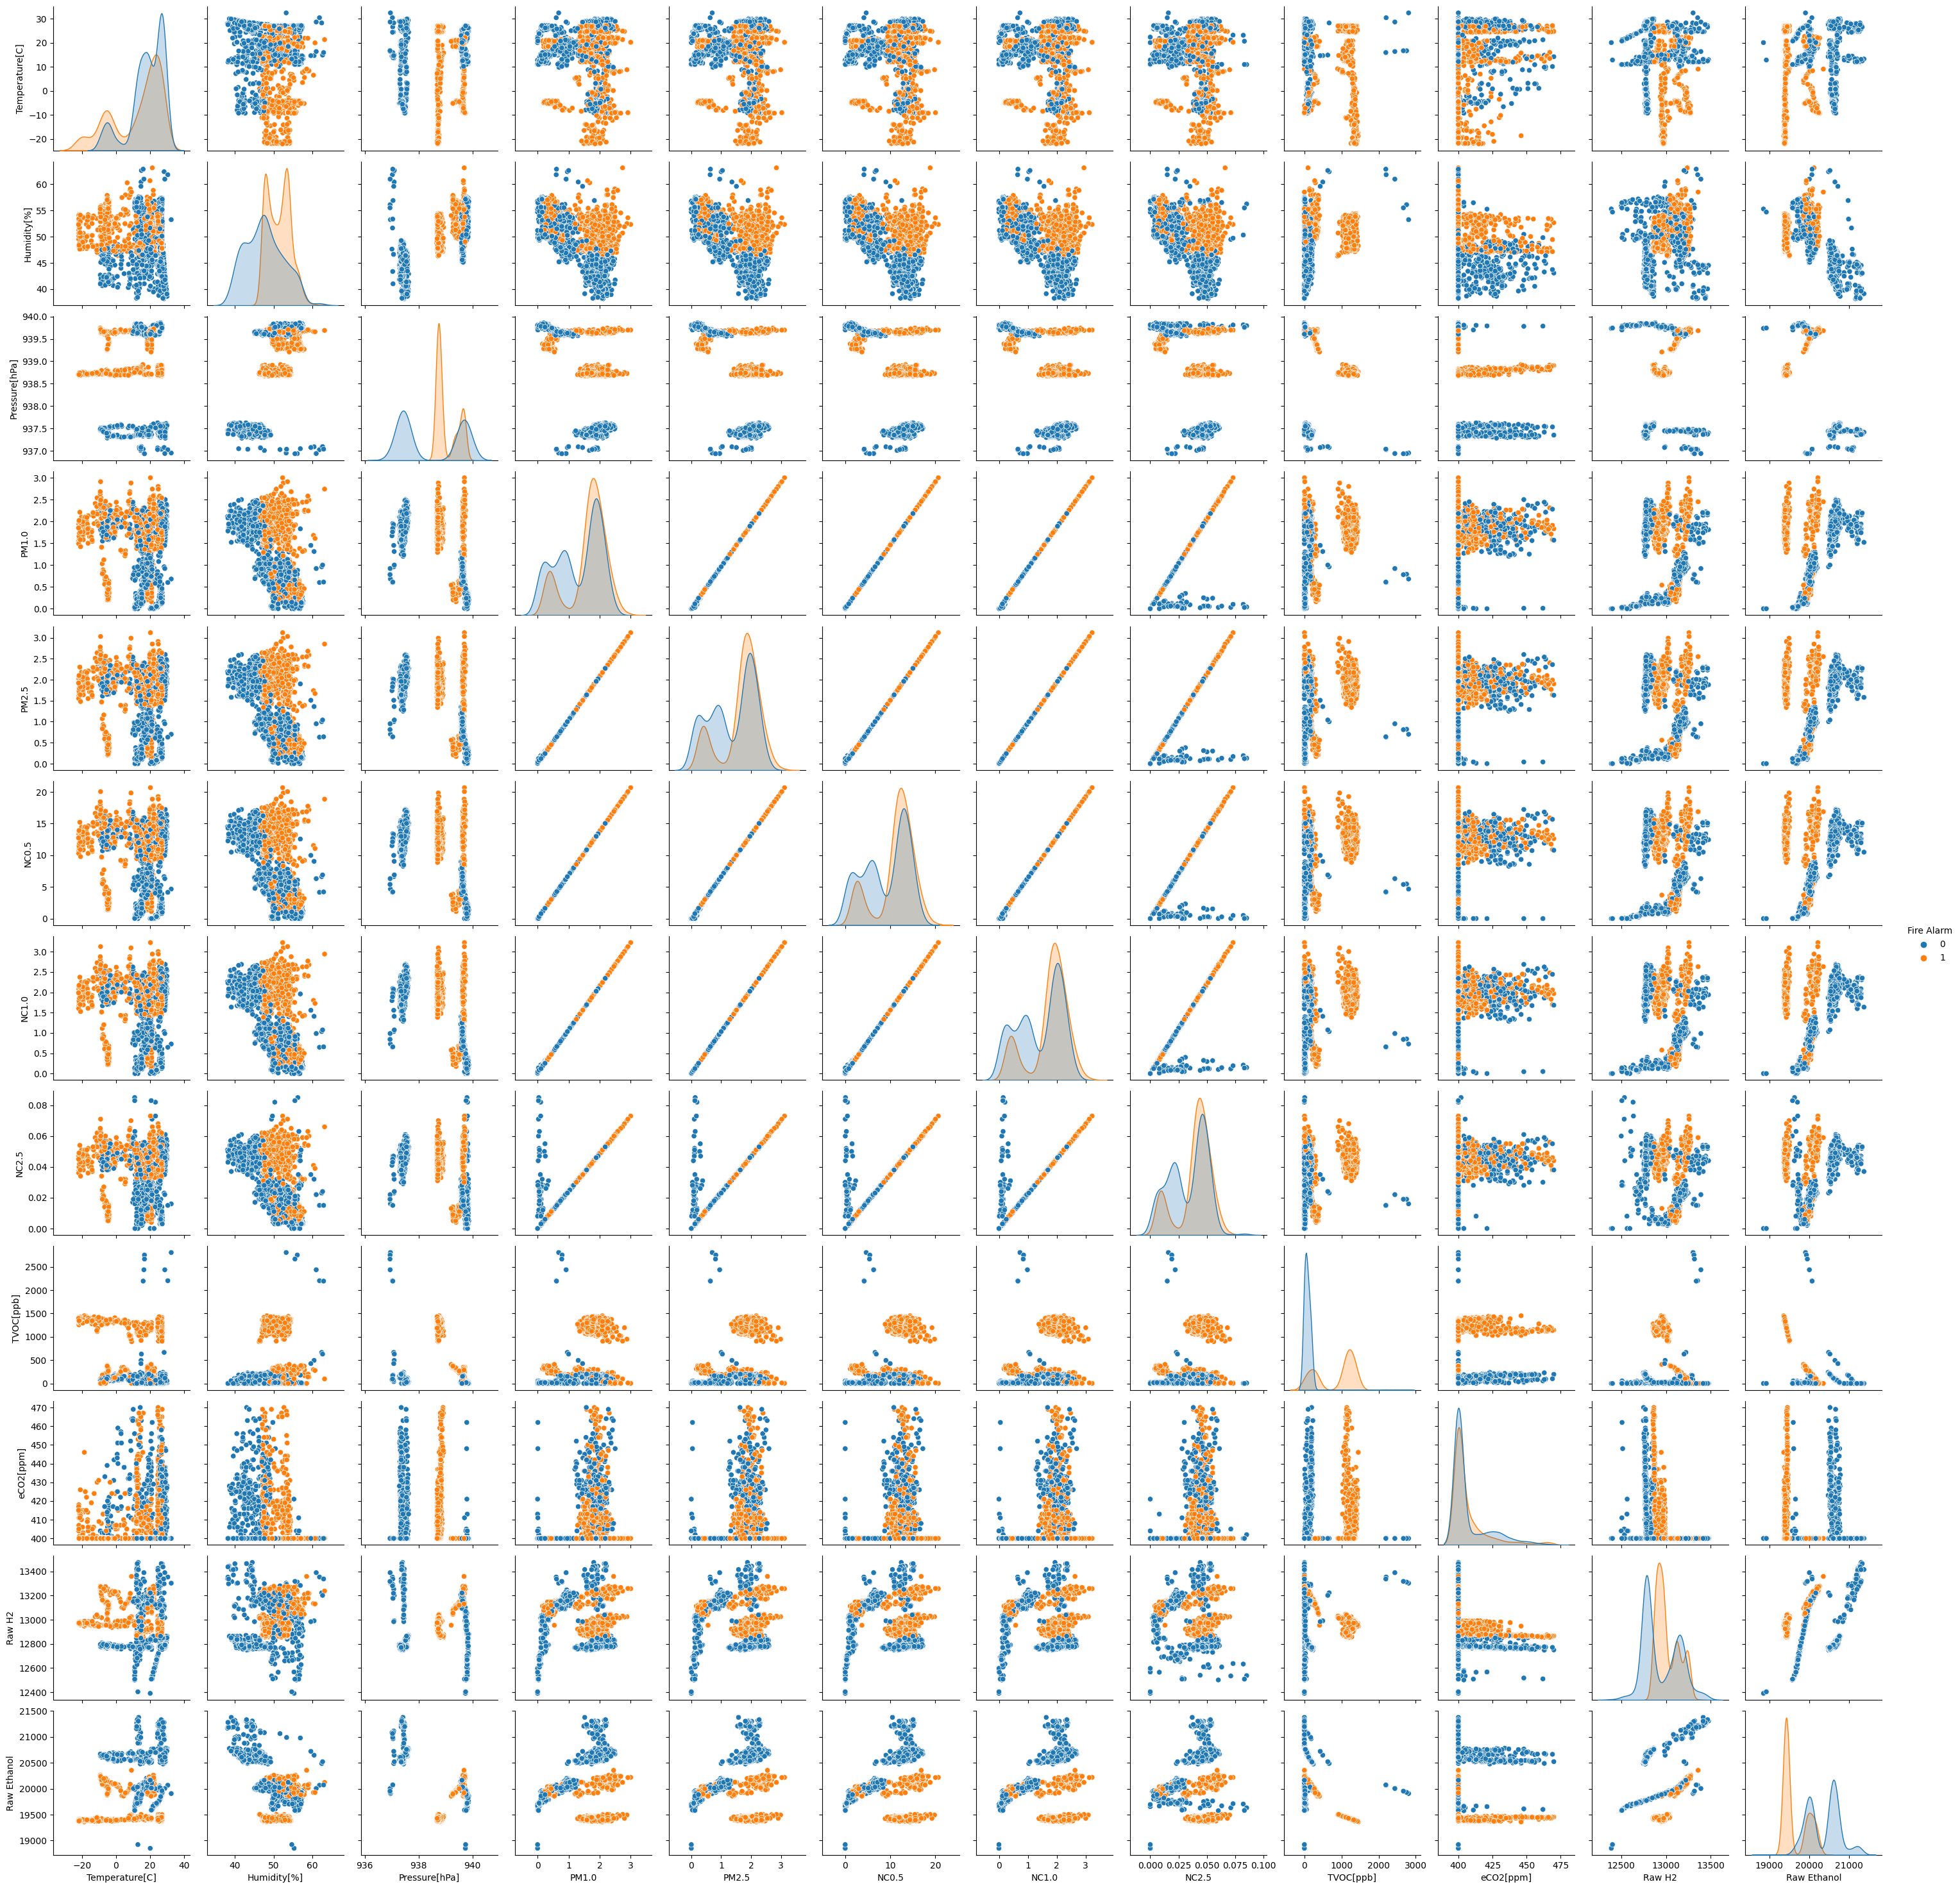

In [377]:
sns.pairplot(
    train_set_bal_cleaned[
        [
            "Temperature[C]",
            "Humidity[%]",
            "Pressure[hPa]",
            "PM1.0",
            "PM2.5",
            "NC0.5",
            "NC1.0",
            "NC2.5",
            "TVOC[ppb]",
            "eCO2[ppm]",
            "Raw H2",
            "Raw Ethanol",
            "Fire Alarm"
        ]
    ].sample(2000),
    hue = "Fire Alarm"
)

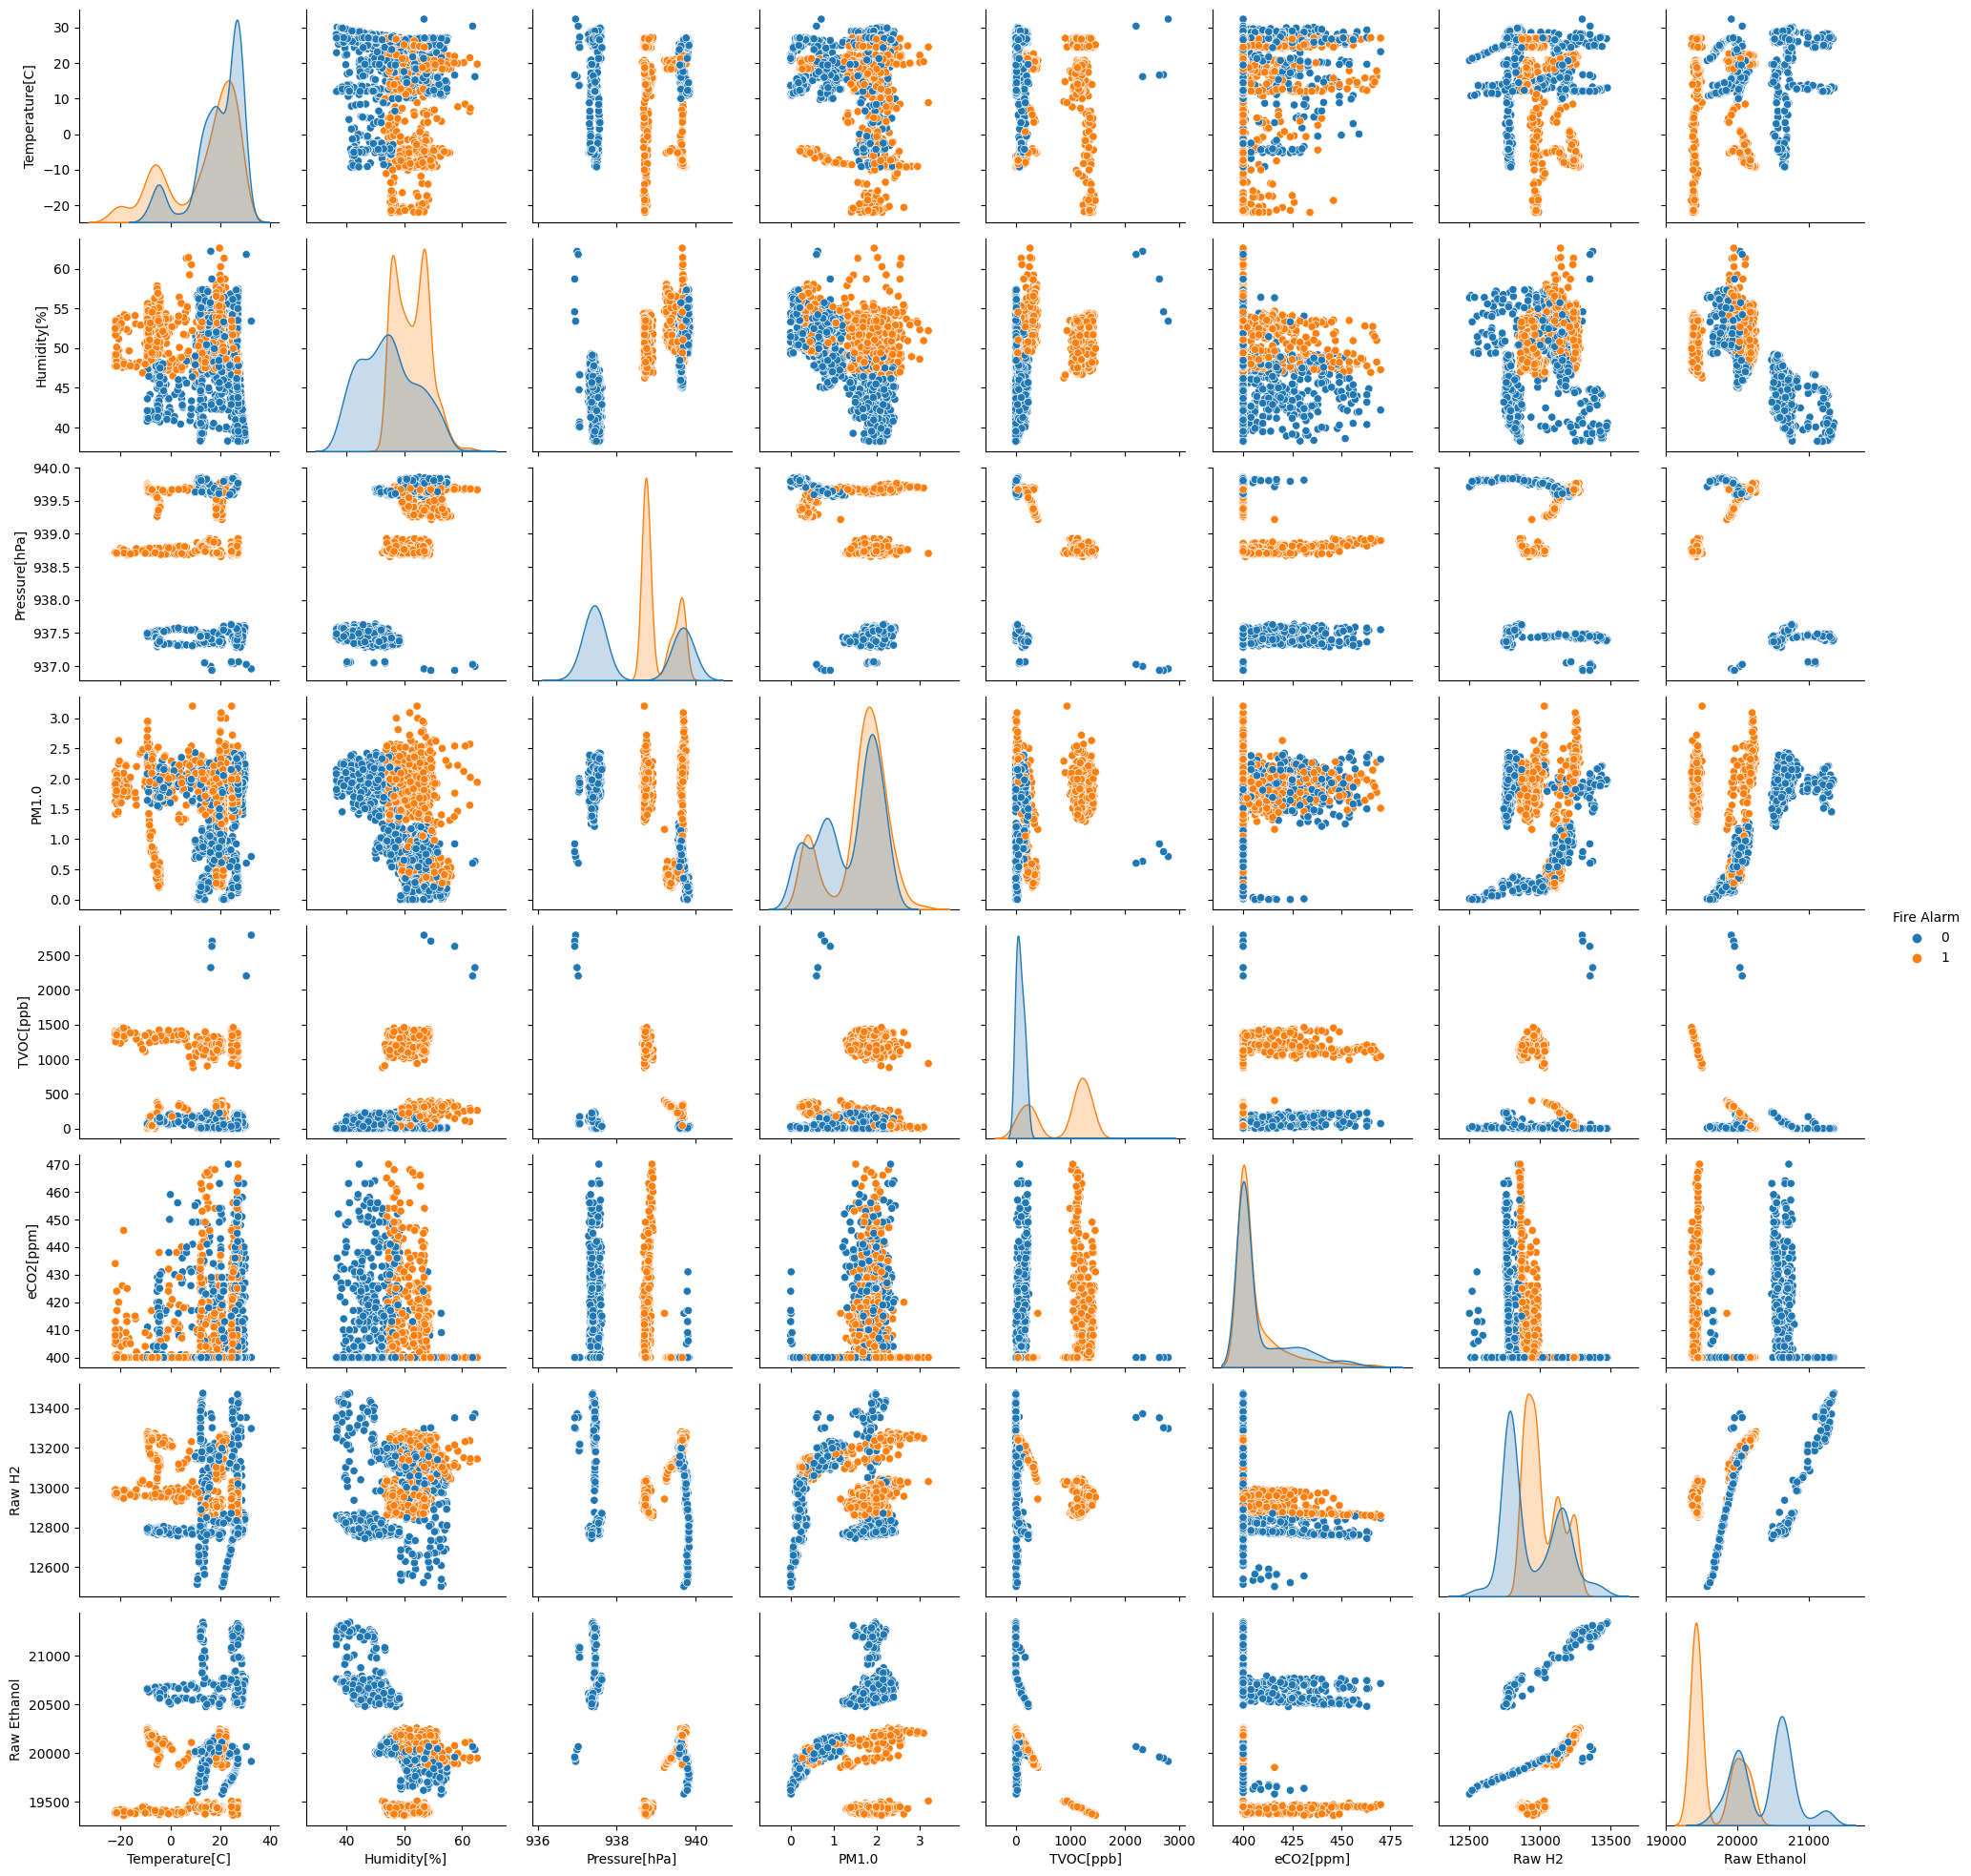

In [380]:
sns.pairplot(
    train_set_bal_cleaned[
        [
            "Temperature[C]",
            "Humidity[%]",
            "Pressure[hPa]",
            "PM1.0",
            "TVOC[ppb]",
            "eCO2[ppm]",
            "Raw H2",
            "Raw Ethanol",
            "Fire Alarm"
        ]
    ].sample(2000),
    hue = "Fire Alarm"
)

<AxesSubplot: >

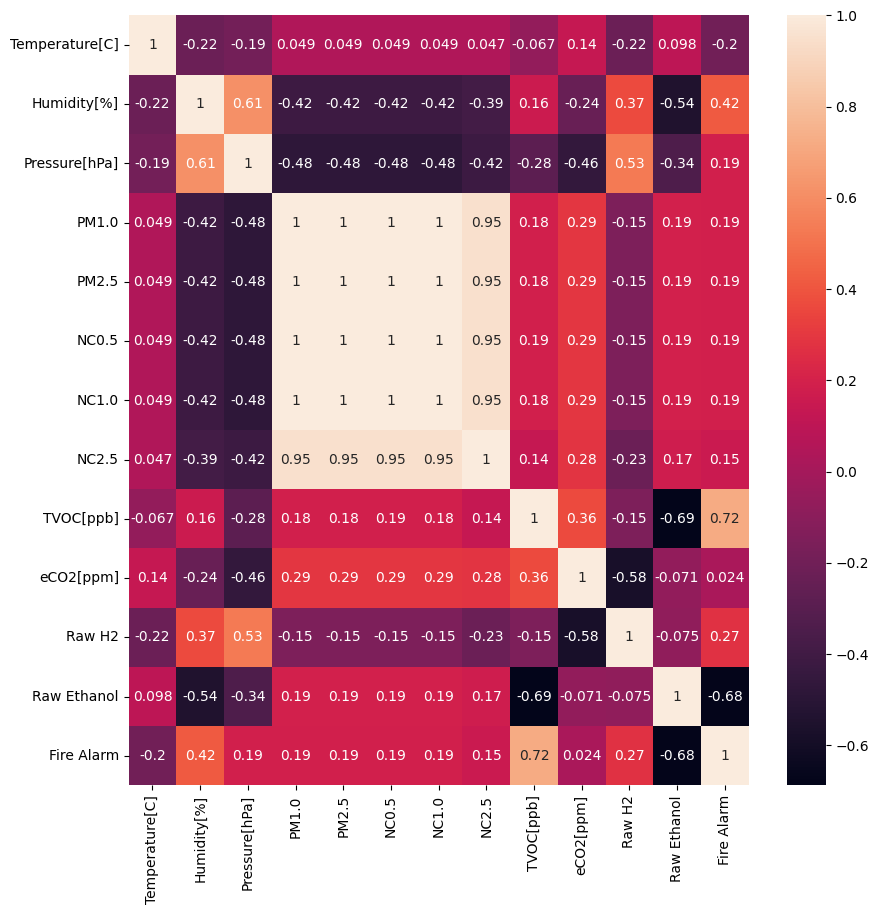

In [387]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train_set_bal_cleaned.corr(method = "spearman"), annot = True, ax = ax)